# Data Visualization

## Objectives

This notebook addresses **Business Requirement 1**:  
*Provide visual differentiation between healthy and mildew-affected cherry leaves.*

---

## Inputs (datasets)

- `inputs/mildew_dataset/cherry-leaves/train`
- `inputs/mildew_dataset/cherry-leaves/validation`
- `inputs/mildew_dataset/cherry-leaves/test`

---

## Outputs

### Dataset Overview

First we will get a statistical representation of the data. This includes:
- a total image count and class distribution (healthy or infected)
- we will show random sample images in a montage to give a visual of the dataset quality

### Image Statistics & Analysis
- Average image dimensions for preprocessing standardization
- Statistical comparison of grayscales between healthy and infected class (t-Test) maybe
- Visual analysis of class separation using Principal Component Analysis (PCA)

### Generated data
- pkl file to store Stores the averaged image dimensions, used to standardize input sizes during preprocessing.
- Visualizations: Key plots and graphics saved for later use in the Streamlit dashboard to support interactive data exploration.

# Import notebook packages

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imageio import imread
import joblib

# Add the ressource directory to our path to be able to load relevant functions
sys.path.append('./src')

## Set working directory and file path architecture for notebook
As the notebooks are set in a subfolder of this repo we need to adjust the working directory so files can be accessed properly. 

First we check our current working directory.

In [2]:
current_dir = os.getcwd()
current_dir

'e:\\Projects\\Code-I\\vscode-projects\\PP5-predictive_analysis\\jupyter_notebooks'

Now we can change the directory to the parent folder that contains the complete repo. We will also print our new working directory so we can check everything worked out as planned.

In [3]:
# Only change the directory if not already at the repo root
current_dir = os.getcwd()
target_dir = os.path.abspath(os.path.join(current_dir, os.pardir))  # One level up

# Check if we're already in the repo root
if os.path.basename(current_dir) == 'jupyter_notebooks':
    os.chdir(target_dir)
    current_dir = os.getcwd()
    print(f"Working directory set to: {os.getcwd()}")
else:
    print(f"Current working directory remains: {current_dir}")

Working directory set to: e:\Projects\Code-I\vscode-projects\PP5-predictive_analysis


## Define data directories

In [4]:
# define variable for data directory
data_dir = os.path.join(os.getcwd(), 'inputs/datasets/raw/cherry-leaves')
# define variable for train set directory
train_dir = os.path.join(data_dir, 'train')
# define variable for test set directory
test_dir = os.path.join(data_dir, 'test')
# define variable for test set directory
val_dir = os.path.join(data_dir, 'validation')

## Check directory integrity

In [5]:
from exploration_visualization import check_structure
# Define the sets and labels for the dataset structure checkup
sets = ['train', 'test', 'validation']
labels = ['healthy', 'diseased']
# Check the integrity of the dataset structure
check_structure(data_dir, sets, labels)

'healthy' in 'train' is valid with 1472 images.
'diseased' in 'train' is valid with 1472 images.
'healthy' in 'test' is valid with 317 images.
'diseased' in 'test' is valid with 317 images.
'healthy' in 'validation' is valid with 315 images.
'diseased' in 'validation' is valid with 315 images.


## Define the output directory




In [6]:
# Set the current version
version = 'v1'
# Define the  directory
output_dir = os.path.join(current_dir, 'outputs', version)

# Check if the versioned output directory already exists
if os.path.exists(output_dir):
    print(f"Output directory '{output_dir}' already exists. "
          "Please create a new version.")
else:
    os.makedirs(output_dir)
    print(f"Created output directory: '{output_dir}'")

Output directory 'e:\Projects\Code-I\vscode-projects\PP5-predictive_analysis\outputs\v1' already exists. Please create a new version.


# Check distribution and balancing of the data

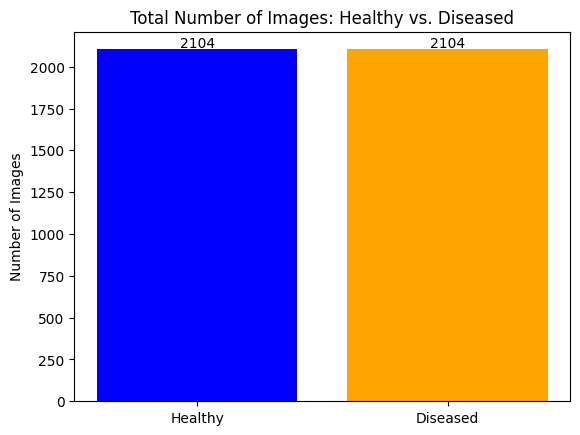

In [7]:
from exploration_visualization import count_images_for_class

splits = ["train", "validation", "test"]
healthy_total = count_images_for_class(data_dir, "healthy", splits)
diseased_total = count_images_for_class(data_dir, "diseased", splits)


plt.bar(["Healthy", "Diseased"], [healthy_total, diseased_total], color=["blue", "orange"])
plt.title("Total Number of Images: Healthy vs. Diseased")
plt.ylabel("Number of Images")

# Add values above bars
for i, count in enumerate([healthy_total, diseased_total]):
    plt.text(i, count + 10, str(count), ha='center')
plt.show()

### Visual Inspection: Sample Images from Test Set

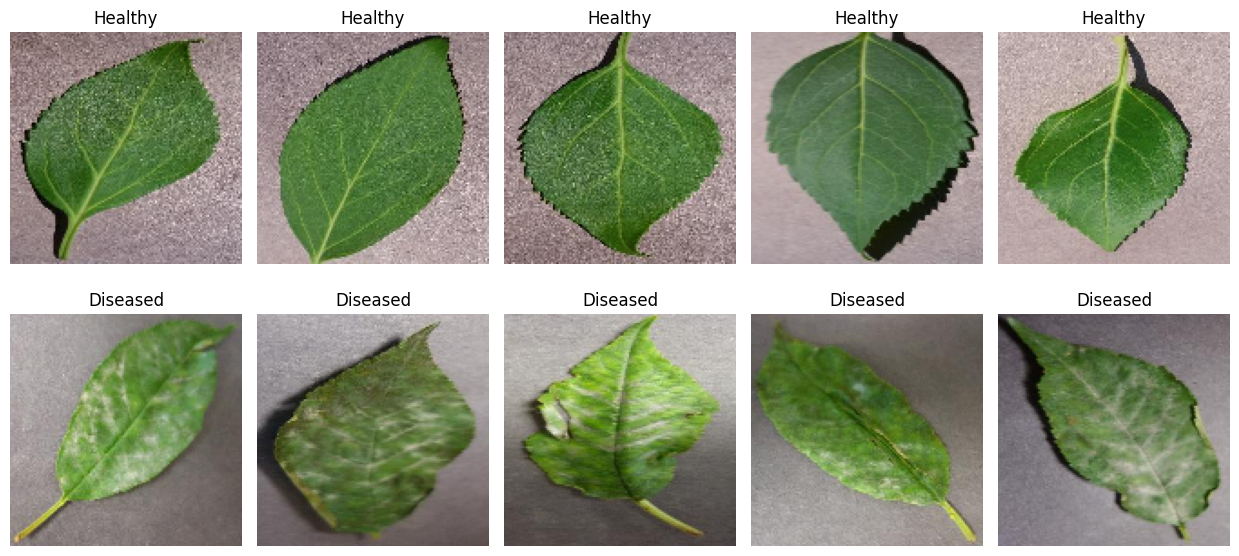

In [8]:
from exploration_visualization import preview_class_samples

# Preview samples from the training set
labels = ['healthy', 'diseased']
test_path = os.path.join(data_dir, "train")
preview_class_samples(test_path, labels, n_images=5, img_size=(128, 128))

## Image Dimension Analysis: Understanding Input Shape for Preprocessing

Before feeding image data into a neural network, it's essential to standardize the input dimensions. This step analyzes the native width and height of training images to:

- Assess consistency across samples

- Identify outliers or irregular shapes

- Determine an appropriate resize target (e.g., 128×128) for model efficiency

A scatter plot visualizes the distribution of image sizes, and red dashed lines indicate the average width and height across the training dataset.

This analysis ensures that resizing decisions are grounded in data, balancing between information retention and computational efficiency.

C:\Users\Ignor\AppData\Local\Temp\ipykernel_21700\3879310292.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(img_path)


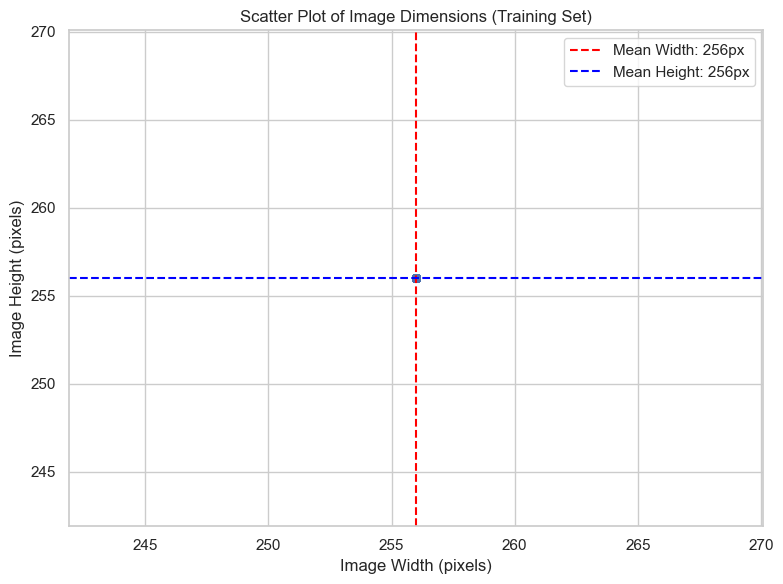

Average Image Dimensions: 256 x 256 pixels


In [9]:
# Collect image dimensions from training set
heights, widths = [], []

for label in labels:
    label_dir = os.path.join(train_dir, label)
    for image_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, image_name)
        img = imread(img_path)
        if img.ndim == 3:  # Ensure image has color channels
            h, w, _ = img.shape
            heights.append(h)
            widths.append(w)

# Compute mean dimensions
mean_height = int(np.mean(heights))
mean_width = int(np.mean(widths))

# Plot: scatter of all image dimensions
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.2, edgecolor=None)
plt.axvline(mean_width, color='red', linestyle='--', label=f"Mean Width: {mean_width}px")
plt.axhline(mean_height, color='blue', linestyle='--', label=f"Mean Height: {mean_height}px")
plt.xlabel("Image Width (pixels)")
plt.ylabel("Image Height (pixels)")
plt.title("Scatter Plot of Image Dimensions (Training Set)")
plt.legend()
plt.tight_layout()
plt.show()

# Summary
print(f"Average Image Dimensions: {mean_width} x {mean_height} pixels")

As we can observe all immages have the same dimensions of 256 x256 pixels.

## Image Size Analysis & Input Standardization

Evaluate dimension trends across classes and define preprocessing parameters like target shape and pixel scaling.

Now that we know the average size of all images it is time to consider ressources and efficiency. To make training more eficcient and ressource efficient we will rescale the images to 128x128 pixels. To do this, we will define an img_shape variable and save it as a .pkl file so we can make use of it in our consecutive steps.

In [10]:
# define image dimensions and save for reuse
img_shape = (128, 128, 3)
joblib.dump(value=img_shape ,
            filename=f"{output_dir}/img_shape.pkl")
img_shape

(128, 128, 3)

Next we will resize the images and load them into an array. The max_images_per_class variable is optional. As we are in the process of data exploration, we want to keep our sample size efficient, if you prefer looking at the whole set this variable can be set to None.

In [11]:
from exploration_visualization import load_and_preprocess_images

X, y = load_and_preprocess_images(
    data_dir=train_dir,
    target_size=img_shape[:2],
    max_images_per_class=40
)

print(X.shape, y.shape)

(80, 128, 128, 3) (80,)


In [12]:
from exploration_visualization import plot_class_image_statistics

plot_class_image_statistics(X, y, output_dir=output_dir, save_image=True)

==== Label: diseased ====
Image shape: (128, 128, 3)
Saved: e:\Projects\Code-I\vscode-projects\PP5-predictive_analysis\outputs\v1\avg_std_diseased.png

==== Label: healthy ====
Image shape: (128, 128, 3)
Saved: e:\Projects\Code-I\vscode-projects\PP5-predictive_analysis\outputs\v1\avg_std_healthy.png



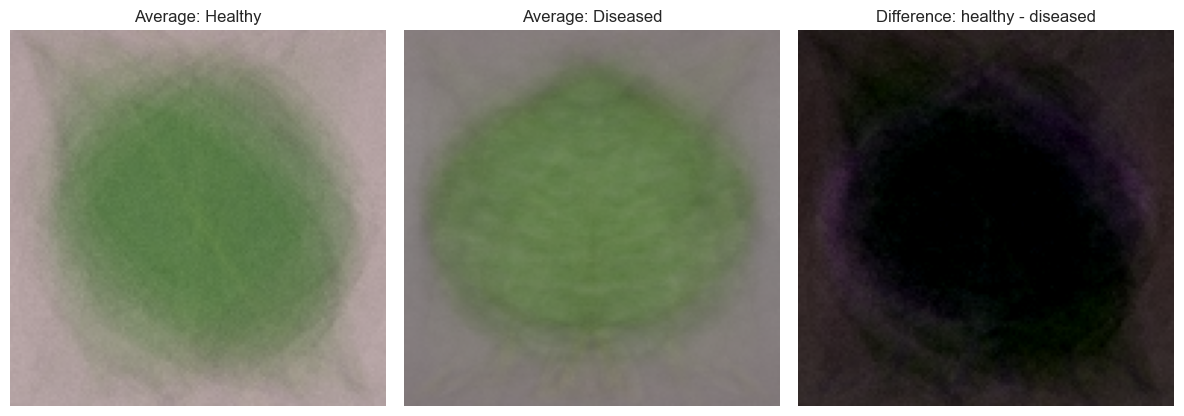

In [13]:
from exploration_visualization import compare_average_images
# Define the file path for saving the average difference image
compare_average_images(
    X=X,
    y=y,
    label_a='healthy',
    label_b='diseased',
    figsize=(12, 10),
    save_path=f"{output_dir}/avg_diff.png"
)

Previewing label: healthy


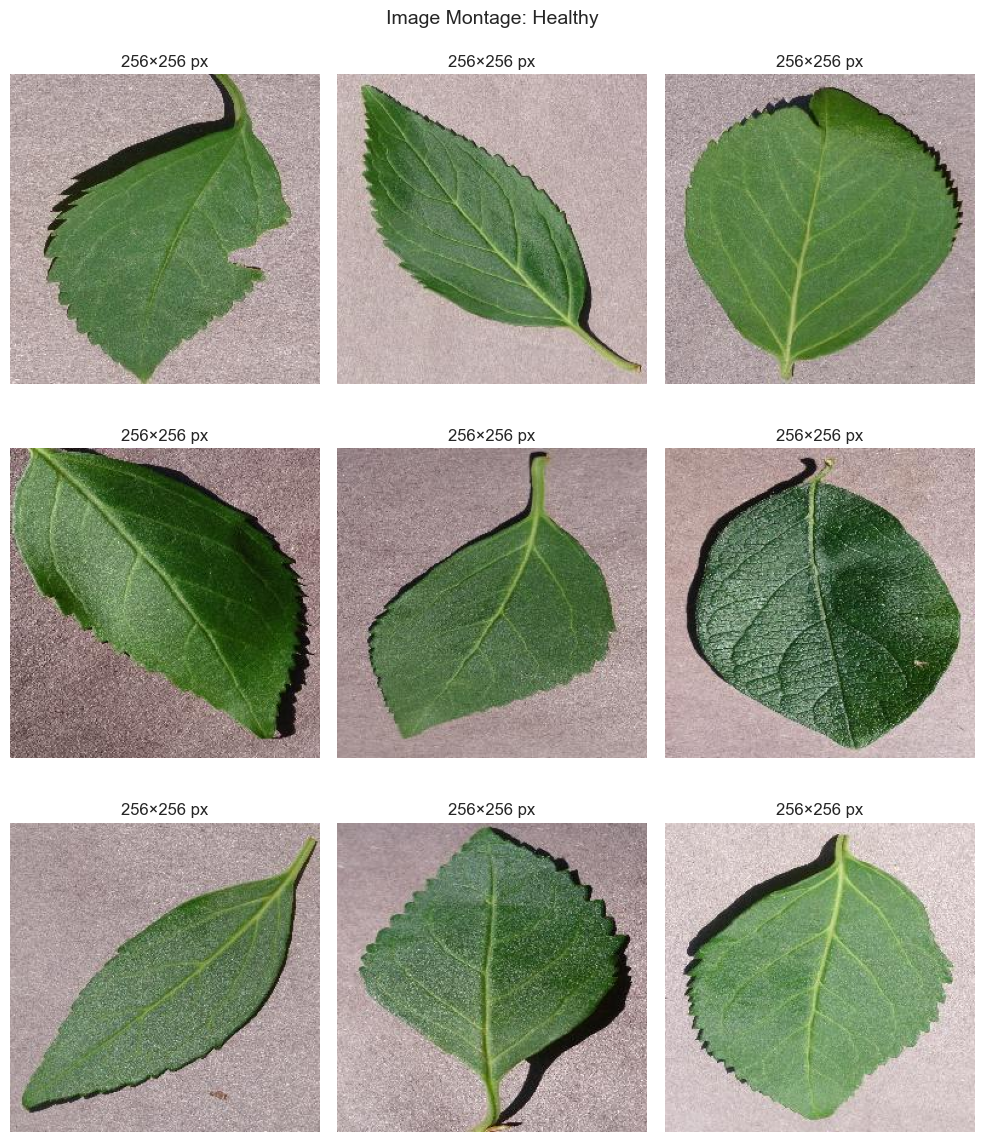



Previewing label: diseased


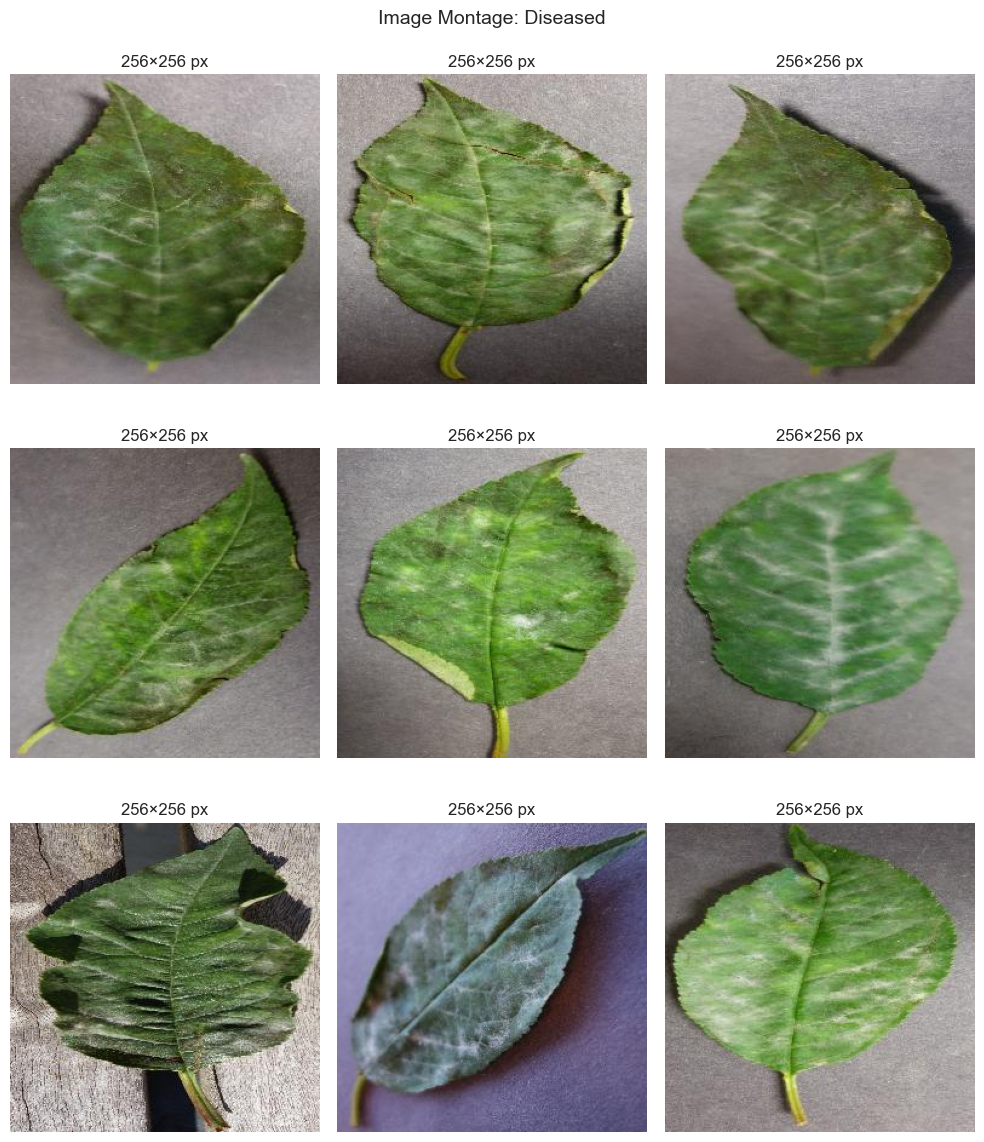

In [15]:
from exploration_visualization import image_montage

# Preview images from the training set
for label in labels:
    print(f"Previewing label: {label}")
    image_montage(
        dir_path=train_dir,
        label=label,
        nrows=3,
        ncols=3,
        figsize=(10, 12)
    )
    print("\n")

## Check Feature Separability

